In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('playstore-analysis (2) (1).csv')
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.000000,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.000000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.000000,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.000000,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.000000,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.000000,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9500.000000,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [4]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
df.shape

(10841, 13)

## 1. Data clean up – Missing value treatment

### a. Drop records where rating is missing since rating is our target/study variable

In [6]:
df['Rating'].isnull().value_counts()

False    9367
True     1474
Name: Rating, dtype: int64

In [7]:
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

## b. Check the null values for the Android Ver column.

In [8]:
df['Android Ver'].isnull().value_counts()

False    10838
True         3
Name: Android Ver, dtype: int64

### i. Are all 3 records having the same problem?

In [20]:
df[df['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


> Yes all three records have NaN

### ii. Drop the 3rd record i.e. record for “Life Made WIFI …”

In [9]:
drop_3rd_record = df[((df.App == "Life Made WI-Fi Touchscreen Photo Frame") & (df['Android Ver'].isnull()))].index
print(drop_3rd_record)
df.drop(drop_3rd_record, inplace=True)

Int64Index([10472], dtype='int64')


In [10]:
df[df['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


### iii. Replace remaining missing values with the mode

In [11]:
df['Android Ver'].mode()

0    4.1 and up
dtype: object

In [12]:
df['Android Ver'] = df['Android Ver'].fillna(df['Android Ver'].mode()[0])

## c. Current ver – replace with most common value

In [25]:
df[df['Current Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2700.0,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11.0,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8700.0,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
7333,Dots puzzle,FAMILY,4.0,179,14000.0,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up


In [26]:
df['Current Ver'] = df['Current Ver'].fillna(df['Current Ver'].mode()[0])

In [27]:
df[df['Current Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


## 2. Data clean up – correcting the data types

### a. Which all variables need to be brought to numeric types?

> Ans. Reviews and Installs need to be in numeric type

### b. Price variable – remove $ sign and convert to float

In [28]:
df['Price']=df.Price.apply(lambda x: x.replace('$','')).astype(float)

In [29]:
df.Price.sample(20)

4204    0.00
2059    0.00
4556    4.99
9140    0.00
3147    0.00
2242    2.99
6248    0.00
6836    0.00
3169    0.00
4925    0.00
722     0.00
186     0.00
2935    0.00
2923    0.00
4811    0.00
1806    0.00
5672    0.00
7302    0.00
5710    0.00
8615    0.00
Name: Price, dtype: float64

### c. Installs – remove ‘,’ and ‘+’ sign, convert to integer

In [30]:
df['Installs']=df.Installs.apply(lambda y: y.replace(',',''))
df['Installs']=df.Installs.apply(lambda y: y.replace('+','')).astype(int)

### d. Convert all other identified columns to numeric

In [31]:
df['Reviews']=df['Reviews'].astype(int)

In [32]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs            int32
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

## 3. Sanity checks – check for the following and handle accordingly

### a. Avg. rating should be between 1 and 5, as only these values are allowed on the play store

#### i. Are there any such records? Drop if so.

In [33]:
(df.Rating>5).value_counts()

False    9366
Name: Rating, dtype: int64

No such record found.

### b. Reviews should not be more than installs as only those who installed can review the app.

#### i. Are there any such records? Drop if so.

In [36]:
(df['Reviews']>df['Installs']).sum()

7

In [37]:
df.drop(df[df['Reviews']>df['Installs']].index, axis=0, inplace=True)

In [38]:
(df['Reviews']>df['Installs']).sum()

0

## 4. Identify and handle outliers

### a. Price column

#### i. Make suitable plot to identify outliers in price

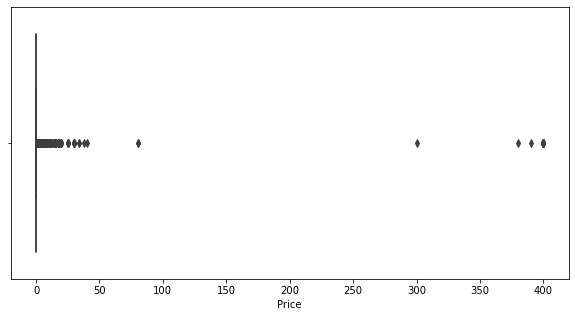

In [39]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Price", data=df);

#### ii. Do you expect apps on the play store to cost $200? Check out these cases

In [40]:
print('Yes we can expect apps on the play store to cost $200')
df.loc[df['Price'] > 200]

Yes we can expect apps on the play store to cost $200


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [41]:
df.drop(df[df['Price']>200].index, axis=0, inplace=True)

In [42]:
(df['Price']>200).sum()

0

#### iii. After dropping the useless records, make the suitable plot again to identify outliers

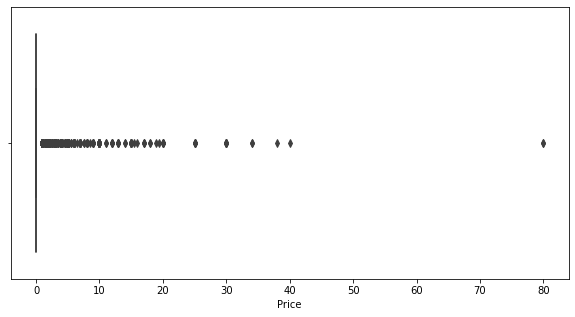

In [43]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Price", data=df);

#### iv. Limit data to records with price < $30

In [44]:
(df['Price']>=30).sum()

6

In [45]:
df.drop(df[df['Price']>=30].index, axis=0, inplace=True)

In [46]:
(df['Price']>=30).sum()

0

### b. Reviews column

#### i. Make suitable plot

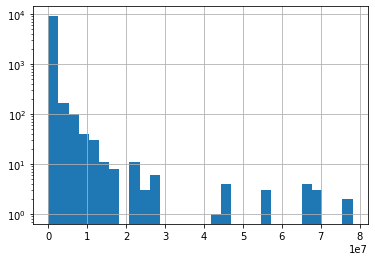

In [47]:
plt.hist(x='Reviews', data=df, bins=30, log=True);
plt.grid(True)

#### ii. Limit data to apps with < 1 Million reviews

In [48]:
(df['Reviews']>=1000000).sum()

704

In [49]:
df.drop(df[df['Reviews']>=1000000].index, axis=0, inplace=True)

In [50]:
(df['Reviews']>=1000000).sum()

0

### c. Installs

#### i. What is the 95th percentile of the installs?

In [51]:
percentile = df['Installs'].quantile(0.95)
percentile

10000000.0


#### ii. Drop records having a value more than the 95th percentile

In [52]:
(df['Installs']>percentile).sum()

199

In [53]:
df.drop(df[df['Installs']>percentile].index, axis=0, inplace=True)

In [54]:
(df['Installs']>percentile).sum()

0

## Data analysis to answer business questions

### 5. What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower values?


#### a. How do you explain this?

Skewness: -1.743427
Kurtosis: 5.153913


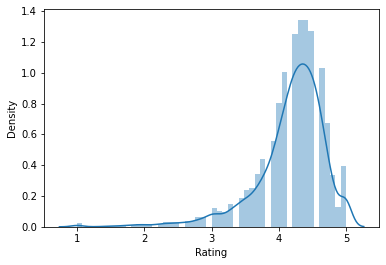

In [55]:
sns.distplot(df['Rating']);
print("Skewness: %f" % df['Rating'].skew())
print("Kurtosis: %f" % df['Rating'].kurt())

> As shown in the above graph, there is a wide gap in the distribution of the Rating, and the tail is bent more towards the left side of the plotting area, which reflects the distribution is negatively skewed.

#### b. What is the implication of this on your analysis?

> The distribution of Rating is Negatively Skewed.Therefore distribution of Rating is more Skewed towards lower values.

### 6. What are the top Content Rating values?
#### a. Are there any values with very few records?

In [56]:
df.groupby('Content Rating').count()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Genres,Last Updated,Current Ver,Android Ver
Content Rating,,,,,,,,,,,,
Adults only 18+,3,3,3,3,3,3,3,3,3,3,3,3
Everyone,6782,6782,6782,6782,6782,6782,6782,6782,6782,6782,6782,6782
Everyone 10+,332,332,332,332,332,332,332,332,332,332,332,332
Mature 17+,417,417,417,417,417,417,417,417,417,417,417,417
Teen,900,900,900,900,900,900,900,900,900,900,900,900
Unrated,1,1,1,1,1,1,1,1,1,1,1,1


> Yes "Unrated" & "Adults only 18+" are having very few records.

#### b. If yes, drop those as they won’t help in the analysis

In [57]:
df.drop(df[df['Content Rating'] == "Adults only 18+"].index, axis=0, inplace=True)
df.drop(df[df['Content Rating'] == "Unrated"].index, axis=0, inplace=True)

In [58]:
df.groupby('Content Rating').count()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Genres,Last Updated,Current Ver,Android Ver
Content Rating,,,,,,,,,,,,
Everyone,6782,6782,6782,6782,6782,6782,6782,6782,6782,6782,6782,6782
Everyone 10+,332,332,332,332,332,332,332,332,332,332,332,332
Mature 17+,417,417,417,417,417,417,417,417,417,417,417,417
Teen,900,900,900,900,900,900,900,900,900,900,900,900


### 7. Effect of size on rating

#### a. Make a joinplot to understand the effect of size on rating

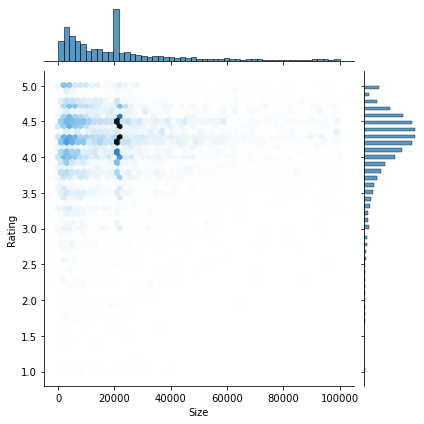

In [59]:
sns.jointplot(data=df, x='Size', y='Rating', kind='hex')
plt.show()

#### b. Do you see any patterns?

> Yes, patterns can be observed between Size and Rating.There is correlation between them.


#### c. How do you explain the pattern?

> The strength of the relationship appears to be moderate because the points are scattered in the graph. The marginal histograms for rating is left-skewed and for size it is right-skewed. Thus we can say that their is positive correlation between Size and Rating.

### 8. Effect of price on rating

#### a. Make a jointplot (with regression line)

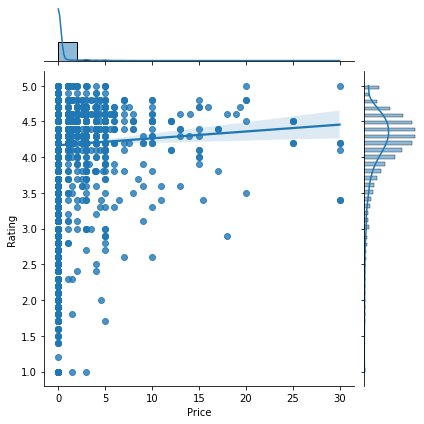

In [60]:
sns.jointplot(data=df, x='Price', y='Rating', kind='reg');

#### b. What pattern do you see?

> As the price increases, Rating remains constant greater than 4.


#### c. How do you explain the pattern?

> There is not much effect of price on ratings as the price increases ratings remain constant between 4.0 to 4.5.


#### d. Replot the data, this time with only records with price > 0


In [61]:
c = df['Price'][df['Price']>0]

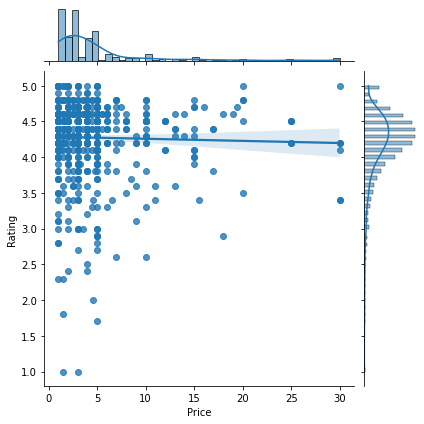

In [62]:
sns.jointplot(data=df, x=c, y='Rating', kind='reg');

#### e. Does the pattern change?

> There is not much change in the pattern when we look for the apps whose price is greater than zero. As we can see there is a slight fall in the ratings when apps are greater than zero.


#### f. What is your overall inference on the effect of price on the rating

> Most of the apps whose price is between 0 to 5 are the one which are having most of the ratings and the apps which are free have highest number of ratings. As the Price increase there is a slight down fall in rating.

### 9. Look at all the numeric interactions together

#### a. Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price'

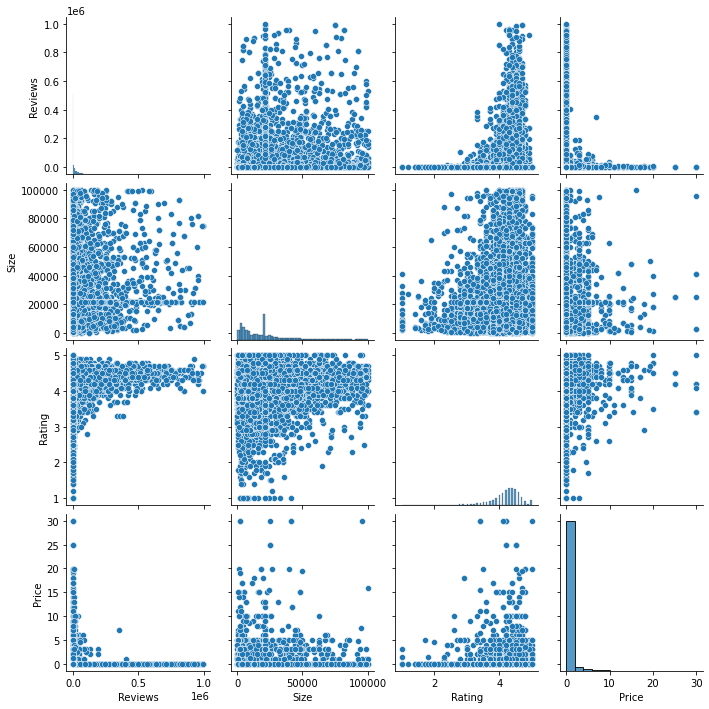

In [63]:
sns.pairplot(data=df, vars=['Reviews', 'Size', 'Rating', 'Price'])
plt.show()

### 10. Rating vs. content rating

#### a. Make a bar plot displaying the rating for each content rating

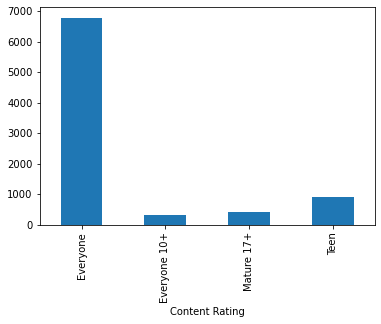

In [64]:
df.groupby(['Content Rating'])['Rating'].count().plot.bar();

#### b. Which metric would you use? Mean? Median? Some other quantile?


> Median as we are having Outliers in Rating.

#### c. Choose the right metric and plot

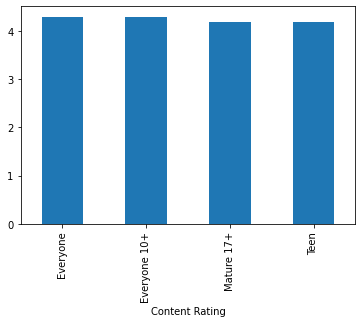

In [65]:
df.groupby(['Content Rating'])['Rating'].median().plot.bar();

### 11. Content rating vs. size vs. rating – 3 variables at a time


#### a. Create 5 buckets (20% records in each) based on Size

In [66]:
bins=[0, 20000, 40000, 60000, 80000, 100000]
df['buckets'] = pd.cut(df['Size'], bins, labels=['0-20k', '20k-40k', '40k-60k', '60k-80k', '80k-100k'])

In [67]:
df.buckets.value_counts()

0-20k       4536
20k-40k     2660
40k-60k      673
60k-80k      300
80k-100k     262
Name: buckets, dtype: int64

#### b. By Content Rating vs. Size buckets, get the rating (20th percentile) for each combination

In [68]:
temp=pd.pivot_table(df, values='Rating', index='buckets', columns='Content Rating', 
                     aggfunc=lambda x:np.quantile(x,0.2))
temp

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
buckets,,,,
0-20k,3.80,4.02,3.5,3.9
20k-40k,4.00,4.00,4.0,3.9
40k-60k,3.90,4.06,4.1,4.0
60k-80k,4.00,4.00,4.0,4.0
80k-100k,4.04,4.10,4.0,4.0


#### c. Make a heatmap of this

#### i. Annotated

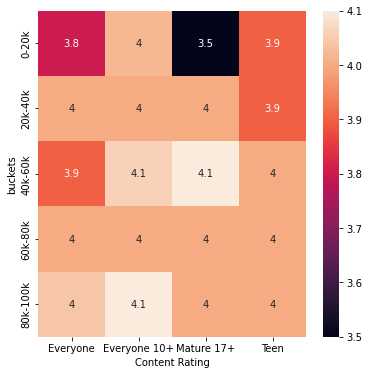

In [69]:
f,ax = plt.subplots(figsize=(6, 6))
sns.heatmap(temp, annot=True)
plt.show()

#### ii. Greens color map

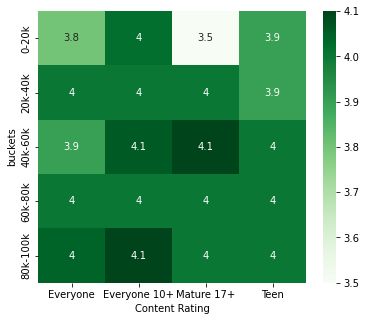

In [70]:
f,ax = plt.subplots(figsize=(6, 5))
sns.heatmap(temp, annot=True, cmap='Greens')
plt.show()

#### d. What’s your inference? Are lighter apps preferred in all categories? Heavier? Some?

>Lighter apps are not preferred in all categories. Apps with size 40k-60k and 80k-100k have got the highest rating in all categories.Thus we can say heavier apps are preferred in all categories.